In [1]:
import io
import sys
import numpy as np



In [2]:
vocab = np.loadtxt('./hw4_vocab.txt',dtype = str)
uni_count = np.loadtxt('./hw4_unigram.txt',dtype = float)
uni_prob  = np.zeros(uni_count.shape)
total = uni_count.sum()
uni_prob = uni_count/total
vocab_m = []
m_prob  = []

# unigram

In [3]:
for i in range(len(vocab)):
    if vocab[i][0] == 'M':
        #print(vocab[i])
        vocab_m.extend([vocab[i]])
        m_prob.extend([uni_prob[i]])
        

In [4]:
for i in range(len(vocab_m)):
    print('Token: ',vocab_m[i],'      Uni-Prob: ',np.round(m_prob[i],6))

Token:  MILLION       Uni-Prob:  0.002073
Token:  MORE       Uni-Prob:  0.001709
Token:  MR.       Uni-Prob:  0.001442
Token:  MOST       Uni-Prob:  0.000788
Token:  MARKET       Uni-Prob:  0.00078
Token:  MAY       Uni-Prob:  0.00073
Token:  M.       Uni-Prob:  0.000703
Token:  MANY       Uni-Prob:  0.000697
Token:  MADE       Uni-Prob:  0.00056
Token:  MUCH       Uni-Prob:  0.000515
Token:  MAKE       Uni-Prob:  0.000514
Token:  MONTH       Uni-Prob:  0.000445
Token:  MONEY       Uni-Prob:  0.000437
Token:  MONTHS       Uni-Prob:  0.000406
Token:  MY       Uni-Prob:  0.0004
Token:  MONDAY       Uni-Prob:  0.000382
Token:  MAJOR       Uni-Prob:  0.000371
Token:  MILITARY       Uni-Prob:  0.000352
Token:  MEMBERS       Uni-Prob:  0.000336
Token:  MIGHT       Uni-Prob:  0.000274
Token:  MEETING       Uni-Prob:  0.000266
Token:  MUST       Uni-Prob:  0.000267
Token:  ME       Uni-Prob:  0.000264
Token:  MARCH       Uni-Prob:  0.00026
Token:  MAN       Uni-Prob:  0.000253
Token:  MS.     

# BIGRAM

In [5]:
bi_count = np.loadtxt('./hw4_bigram.txt',dtype = float)

In [6]:
bigram_the = bi_count[bi_count[:,0]==4]    

In [7]:
THE_count = uni_count[3]
THE_count

3855375.0

In [11]:
sorted_bigram_the[::-1][:20]

array([[   4.,  270.,    1.],
       [   4.,  140.,    1.],
       [   4.,  145.,    1.],
       [   4.,  139.,    1.],
       [   4.,  150.,    1.],
       [   4.,  157.,    1.],
       [   4.,  120.,    1.],
       [   4.,  164.,    1.],
       [   4.,  386.,    1.],
       [   4.,   44.,    1.],
       [   4.,  358.,    1.],
       [   4.,  195.,    1.],
       [   4.,   37.,    1.],
       [   4.,  200.,    1.],
       [   4.,  109.,    1.],
       [   4.,  301.,    1.],
       [   4.,  343.,    1.],
       [   4.,  470.,    1.],
       [   4.,  318.,    1.],
       [   4.,   93.,    1.]])

In [10]:
sorted_bigram_the = bigram_the[bigram_the[:,2].argsort()[::-1]]
bigram_top_10 = sorted_bigram_the[:10]
top_10_vocab_index = np.subtract(bigram_top_10[:,1].astype(int),np.ones(10)) 
# gives us the index of the word in the 'vocab' array
top_10_words = top_10_words = vocab[top_10_vocab_index.astype(int)]
top_10_counts = bigram_top_10[:,2]
top_10_prob   = top_10_counts/THE_count


In [12]:
import pandas as pd
probs = {'words': top_10_words,'probability': top_10_prob}

pd.DataFrame(data = probs)

,words,probability
0,<UNK>,0.615020
1,U.,0.013372
2,FIRST,0.011720
3,COMPANY,0.011659
4,NEW,0.009451
5,UNITED,0.008672
6,GOVERNMENT,0.006803
7,NINETEEN,0.006651
8,SAME,0.006287
9,TWO,0.006161


## The stock market fell by one hundred points last week ##

In [13]:
######### UNIGRAM ############
string = 'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK'
sentence = string.split(' ')
sentence

['THE',
 'STOCK',
 'MARKET',
 'FELL',
 'BY',
 'ONE',
 'HUNDRED',
 'POINTS',
 'LAST',
 'WEEK']

In [14]:
total = uni_count.sum()
uni_prob = uni_count/total

vocab_ind = []
word_prob = []
word_count = []
cummu_prob = []
for i in range(len(sentence)):
    vocab_ind.extend([np.where(vocab==sentence[i])])
    
    prob = uni_prob[vocab_ind[i]][0]
    word_prob.extend([prob])
    word_count.extend([])
    if i == 0:
        cummu_prob.extend([word_prob[i]])
    else:
        cummu_prob.extend([cummu_prob[i-1]*word_prob[i]])

In [15]:
print('log cummulative probabilty: ',np.log(cummu_prob[-1]))


log cummulative probabilty:  -64.5094403436


In [16]:
.047*.000668

3.1395999999999996e-05

In [17]:
prob_dict = {'prob': word_prob,'word': sentence} 
pd.DataFrame(columns = ['word','prob'], data = prob_dict)

,word,prob
0,THE,0.047152
1,STOCK,0.000668
2,MARKET,0.000780
3,FELL,0.000265
4,BY,0.004180
5,ONE,0.006006
6,HUNDRED,0.004021
7,POINTS,0.000221
8,LAST,0.001161
9,WEEK,0.000572


In [18]:
########## BIGRAM APPROACH ###############
string = '<s> THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK'
sentence = string.split(' ')
sentence


vocab_ind = []
bigram_num = [] #equals the vocab index +1
bigram_count = []
bigram_prob  = []
word_count = []
cummu_prob = []


# first pass start loggin word indexes and total occurances

for i in range(len(sentence)):
    
    vocab_ind.extend([np.where(vocab==sentence[i])])
    bigram_num.extend([vocab_ind[i][0]+1])
    word_count.extend([uni_count[vocab_ind[i][0]]])
    
for i in range(len(sentence)-1):
    
    parent = bigram_num[i][0]
    child  = bigram_num[i+1][0]
    cond_count = bi_count[(bi_count[:,0] == parent) & (bi_count[:,1]==child)][0][-1]
    bigram_count.extend([cond_count])
    bigram_prob.extend([cond_count/word_count[i]])
    if i == 0:
        cummu_prob.extend([bigram_prob[i]])
    else:
        cummu_prob.extend([cummu_prob[i-1]*bigram_prob[i]])


print('log likelihood:',np.log(cummu_prob[-1]))



log likelihood: [-40.91813213]


## “The sixteen officials sold fire insurance"

#### UNIGRAM ####

In [19]:
######### UNIGRAM ############
string = 'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE'
sentence = string.split(' ')
sentence

total = uni_count.sum()
uni_prob = uni_count/total

vocab_ind = []
word_prob = []
word_count = []
cummu_prob = []
for i in range(len(sentence)):
    vocab_ind.extend([np.where(vocab==sentence[i])])
    
    prob = uni_prob[vocab_ind[i]][0]
    word_prob.extend([prob])
    word_count.extend([])
    if i == 0:
        cummu_prob.extend([word_prob[i]])
    else:
        cummu_prob.extend([cummu_prob[i-1]*word_prob[i]])
        
print('log likelihood:',np.log(cummu_prob[-1]))

log likelihood: -44.2919344731


#### BIGRAM ####

In [20]:
string = '<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE'
sentence = string.split(' ')
sentence


vocab_ind = []
bigram_num = [] #equals the vocab index +1
bigram_count = []
bigram_prob  = []
word_count = []
cummu_prob = []
faulty_pairs = []


# first pass start loggin word indexes and total occurances

for i in range(len(sentence)):
    
    vocab_ind.extend([np.where(vocab==sentence[i])])
    bigram_num.extend([vocab_ind[i][0]+1])
    word_count.extend([uni_count[vocab_ind[i][0]]])
    
for i in range(len(sentence)-1):
    
    parent = bigram_num[i][0]
    child  = bigram_num[i+1][0]
    try:
        cond_count = bi_count[(bi_count[:,0] == parent) & (bi_count[:,1]==child)][0][-1]
        bigram_count.extend([cond_count])
        bigram_prob.extend([cond_count/word_count[i]])
        
    except:
        
        # there is no conditional probability, child is independent of the parent, 
        # calculate unigram probability for the child
        
        # vocab value for parent, child
        faulty_pairs.extend([(vocab[vocab_ind[i]][0],vocab[vocab_ind[i+1]][0])]) 
        cond_count = 0
        bigram_count.extend([cond_count])
        bigram_prob.extend([cond_count/word_count[i]])
        
    if i == 0:
        cummu_prob.extend([bigram_prob[i]])
    else:
        cummu_prob.extend([cummu_prob[i-1]*bigram_prob[i]])


print('log likelihood:',np.log(cummu_prob[-1]))


log likelihood: [-inf]


C:\Users\Steve\Anaconda2\envs\PyStorch\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


In [21]:
bigram_prob

[array([ 0.15865263]),
 array([ 0.00022851]),
 array([ 0.]),
 array([  9.16220773e-05]),
 array([ 0.]),
 array([ 0.0030524])]

In [22]:
#### PAIRS NOTE SEEN ###

'SIXTEEN OFFICIALS'
'SOLD FIRE'

'SOLD FIRE'

#### MIXTURE MODEL ####

In [23]:
# for each model, the probability of each element was tallied in 
# the word_prob and bigram_prob lists
# we will use these while tuning the lambda function
uni_prob = word_prob # unigram model P(ith element)
bi_prob = bigram_prob # bigram model P(child|parent)
lmbda_score = []

for lmbda in np.linspace(0,1.001,1000):
    prob = 1
    for i in range(len(word_prob)):
        
        prob = prob*(uni_prob[i]*lmbda + (1-lmbda)*bi_prob[i])
        
    lmbda_score.extend([prob])

C:\Users\Steve\Anaconda2\envs\PyStorch\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


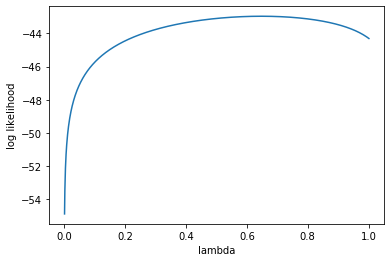

In [24]:

lmbda_score = np.log(lmbda_score)
lmbda_val   = np.linspace(0,1.001,1000)
import matplotlib.pyplot as plt
plt.xlabel('lambda')
plt.ylabel('log likelihood')
plt.plot(np.linspace(0,1.001,1000),lmbda_score)
plt.show()

In [25]:
np.where(lmbda_score == np.max(lmbda_score))
max_lambda = lmbda_val[647]
print(max_lambda,np.max(lmbda_score))

0.648295295295 -42.9641380717


# 4.4 Stock Market Prediction #

## part a ##

The model is essentially a time lag model that predicts the value at the next time step to be equivalent to the current time step, as evidenced by the heavy weight on a3. This is a poor model because it essentially admits that it does not know if the price will go up or down, so the safest bet is to predict the same as the previous step in order to minimize the prediction loss.


In [26]:
nasdaq_train = np.loadtxt('./nasdaq00.txt',dtype = float)
nasdaq_test  = np.loadtxt('./nasdaq01.txt',dtype = float)


# condition the data
nasdaq_train_three_step = []
train_y = []
for i in range(2,len(nasdaq_train)-1):
    nasdaq_train_three_step.append([nasdaq_train[i-2],nasdaq_train[i-1],\
                                    nasdaq_train[i]])
    train_y.extend([nasdaq_train[i+1]])

train_y = np.array([train_y])

nasdaq_test_three_step = []
test_y = []
for i in range(2,len(nasdaq_test)-1):
    nasdaq_test_three_step.append([nasdaq_test[i-2],nasdaq_test[i-1],nasdaq_test[i]])
    test_y.extend([nasdaq_test[i+1]])

test_y = np.array([test_y])

In [27]:
import numpy as np
A_inv = np.linalg.pinv(nasdaq_train_three_step)
weights = A_inv@train_y.T
print(weights[:])

[[ 0.03189569]
 [ 0.01560133]
 [ 0.95067337]]


### WEIGHTS a1,a2,a3 

In [28]:
for i in range(3):
    print('a%i : %f'%(i+1,weights[i]))

a1 : 0.031896
a2 : 0.015601
a3 : 0.950673


# Part b

In [29]:
# test the data
y_pred=[]
for i in range(test_y.shape[1]):
    pred = nasdaq_test_three_step[i]@weights
    y_pred.extend([pred])
    
# vector form
y_pred_tr = nasdaq_train_three_step@weights


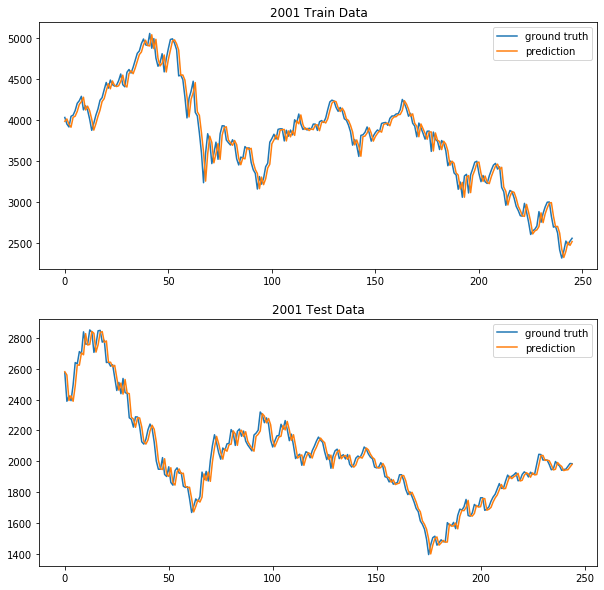

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(range(train_y.shape[1]),train_y.flatten())
plt.plot(range(train_y.shape[1]),nasdaq_train_three_step@weights)
plt.legend(['ground truth','prediction'])
plt.title('2001 Train Data')

plt.subplot(2,1,2)
plt.plot(range(test_y.shape[1]),test_y.flatten())
plt.plot(range(test_y.shape[1]),y_pred)
plt.legend(['ground truth','prediction'])
plt.title('2001 Test Data')
plt.show()

### Mean Squared Error ###

In [428]:
squared_error_tr = 0 # tr = train
error_tr = 0
squared_error_t  =0     # t = test
error_t =0
for i in range(test_y.shape[1]):
    
    squared_error_t    += (test_y[0][i]-y_pred[i])**2
    error_t            += test_y[0][i]-y_pred[i]
    squared_error_tr   += (train_y[0][i]-y_pred_tr[i])**2
    error_tr           += train_y[0][i]-y_pred_tr[i]
    
    
mse_t = squared_error_t/test_y.shape[1]
mse_tr = squared_error_tr/train_y.shape[1]
print('MSE Test: ',np.round(mse_t[0],2),'  MSE Train: ',np.round(mse_tr[0],2))

MSE Test:  2985.1   MSE Train:  13895.86


# Recommendation: Don't Use

The model is essentially a time lag model that predicts the value at the next time step to be equivalent to the current time step, as evidenced by the heavy weight on a3. This is a poor model because it essentially admits that it does not know if the price will go up or down, so the safest bet is to predict the same as the previous step in order to minimize the prediction loss.